In [3]:
from roll_sim.code import roll, utils
from roll_sim.scripts import run_rolldown
from pathlib import Path
from copy import deepcopy
from matplotlib import pyplot as plt
import os

In [4]:
def rolldown(conf, rolldowns, headliner_mechanic):
    headliners, level, other = run_rolldown.get_and_validate_data(conf = conf)
    # Ensure that this gets data from data folder correctly,
    # wherever it is run from.
    path_script = Path().resolve()
    path_roll_sim = path_script.parent.resolve()
    path_data = path_roll_sim / "data"

    # Load and prepare data, apply pool depletion, convert into Champion objects.
    champions, headliners = run_rolldown.prepare_data(path_data, headliners, level, other)

    # Simulate rolldown and get results.
    simulator = roll.RolldownSimulator(champions=champions, champions_to_buy=headliners)
    avg_rolls = simulator.roll(rolldowns=rolldowns, headliner_mechanic=headliner_mechanic)
    return avg_rolls

In [5]:
conf = {
"level":7,
"headliners":
    [
    {"name": "Sett", "headlined_trait": "Mosher"},
    {"name": "Sett", "headlined_trait": "Heartsteel"},
    {"name": "Sett", "headlined_trait": "Bruiser"},
    ],
}

In [8]:
conf_deepcopy = deepcopy(conf)
conf_deepcopy["headliners"][2]["copies_held"] = 0
print(conf_deepcopy)

with_hd = rolldown(conf_deepcopy,rolldowns=100,headliner_mechanic=True)
without_hd = rolldown(conf_deepcopy,rolldowns=100,headliner_mechanic=False)
print(with_hd)
print(without_hd)

{'level': 7, 'headliners': [{'name': 'Sett', 'headlined_trait': 'Mosher'}, {'name': 'Sett', 'headlined_trait': 'Heartsteel'}, {'name': 'Sett', 'headlined_trait': 'Bruiser', 'copies_held': 0}]}
62.47
83.18


{'level': 7, 'headliners': [{'name': 'Sett', 'headlined_trait': 'Mosher', 'copies_held': 0, 'copies_taken': 0}, {'name': 'Sett', 'headlined_trait': 'Heartsteel', 'copies_held': 0, 'copies_taken': 0}, {'name': 'Sett', 'headlined_trait': 'Bruiser', 'copies_held': 0, 'copies_taken': 0}]}
{'level': 7, 'headliners': [{'name': 'Sett', 'headlined_trait': 'Mosher', 'copies_held': 1, 'copies_taken': 1}, {'name': 'Sett', 'headlined_trait': 'Heartsteel', 'copies_held': 1, 'copies_taken': 1}, {'name': 'Sett', 'headlined_trait': 'Bruiser', 'copies_held': 1, 'copies_taken': 1}]}
{'level': 7, 'headliners': [{'name': 'Sett', 'headlined_trait': 'Mosher', 'copies_held': 2, 'copies_taken': 2}, {'name': 'Sett', 'headlined_trait': 'Heartsteel', 'copies_held': 2, 'copies_taken': 2}, {'name': 'Sett', 'headlined_trait': 'Bruiser', 'copies_held': 2, 'copies_taken': 2}]}
{'level': 7, 'headliners': [{'name': 'Sett', 'headlined_trait': 'Mosher', 'copies_held': 3, 'copies_taken': 3}, {'name': 'Sett', 'headlined_tr

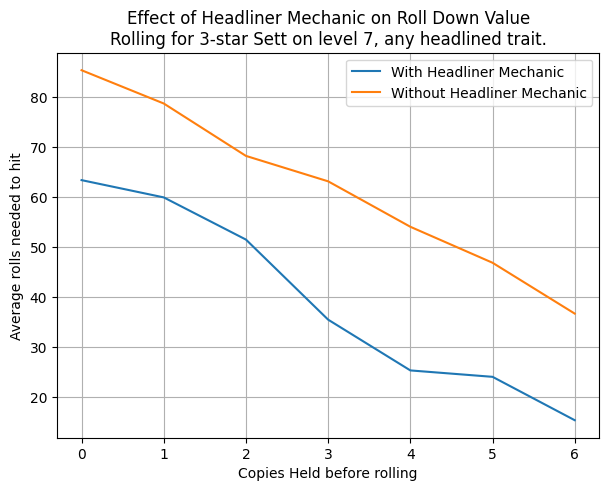

In [15]:
conf_deepcopy = deepcopy(conf)
x = list(range(9))
with_hd = []
without_hd = []
for copies_held in x:
    conf_deepcopy["headliners"][0]["copies_held"] = copies_held
    conf_deepcopy["headliners"][1]["copies_held"] = copies_held
    conf_deepcopy["headliners"][2]["copies_held"] = copies_held
    conf_deepcopy["headliners"][0]["copies_taken"] = copies_held
    conf_deepcopy["headliners"][1]["copies_taken"] = copies_held
    conf_deepcopy["headliners"][2]["copies_taken"] = copies_held
    print(conf_deepcopy)
    with_hd.append(rolldown(conf_deepcopy,rolldowns=1000,headliner_mechanic=True))
    without_hd.append(rolldown(conf_deepcopy,rolldowns=1000,headliner_mechanic=False))

plt.figure(figsize=(7, 5))  # Adjust size as needed
plt.plot(x, with_hd, label='With Headliner Mechanic')
plt.plot(x, without_hd, label='Without Headliner Mechanic')

plt.xlabel('Copies Held before rolling')
plt.ylabel('Average rolls needed to hit')
title = 'Effect of Headliner Mechanic on Roll Down Value\nRolling for 3-star Sett on level 7, any headlined trait.'
plt.title(title)

plt.xticks(x)  # Ensure all x values are shown
plt.legend()  # Show legend

plt.grid(True)  # Add grid for better readability

plt.show()